In [128]:
from sklearn.ensemble import IsolationForest 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.linear_model import LogisticRegressionCV
from sklearn.feature_selection import VarianceThreshold

import pandas as pd
import numpy as np

from tqdm import tqdm

import seaborn as sns
from matplotlib import pyplot as plt

1. Загрузите данные из источника по ссылке. Нам нужен файл X_train.txt (там будет чуть более 7 тысяч наблюдений). Чтобы подгрузить этот файл, можно воспользоваться функцией loadtxt библиотеки numpy.

In [129]:
data = np.loadtxt('X_train.txt', dtype='float64').tolist()

In [130]:
df = pd.DataFrame(data=data)

2. Ознакомьтесь с данными:

    выведите количество признаков;

    есть ли в данных пропуски;

    отличаются ли различные признаки по масштабу.

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, 0 to 560
dtypes: float64(561)
memory usage: 31.5 MB


В данных нет пропусков

In [132]:
df.isna().sum().sum() # количество пропусков в данных

0

In [133]:
df.mean().mean() # среднее средних признаков

-0.508365037734111

In [134]:
df.median().median() # медиана медиан

-0.916926385

По средней и медиане видно, что признаки не сильно отличаются по масштабу

4. Понизьте размерность данных:

воспользуйтесь методом порога отклонения, чтобы избавиться от наблюдений, вариативность по которым низка. Удалите не более 10 % признаков;

воспользуйтесь методом PCA:

приведите признаки к одинаковому масштабу,

визуализируйте зависимость степени объяснения дисперсии исходных данных от количества выделяемых главных компонент,

определите минимальное необходимое количество главных компонент,  при которых объяснение дисперсии исходных данных будет достаточно велико (хотя бы 90 %),

выделите первые две главные компоненты и с помощью визуализации убедитесь, что новые признаки позволяют неплохо отделить данные друг от друга.

In [135]:
var = VarianceThreshold(threshold=0.01)
df = var.fit_transform(df)
df = pd.DataFrame(df)
df.shape

(7352, 524)

Было удалено 37 признаков, что меньше 10%

Масштабировать признаки не имеет смысла, так как они не отличаются по масштабу

<function matplotlib.pyplot.show(close=None, block=None)>

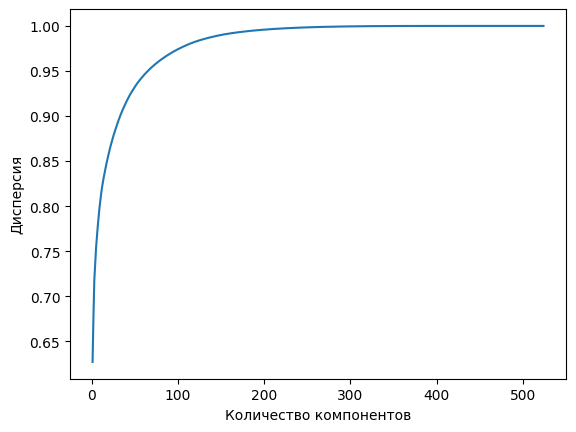

In [136]:
pca = PCA()
df_pca = pca.fit_transform(df)

exp_var = pca.explained_variance_ratio_
plt.plot(range(1, len(exp_var)+1),np.cumsum(exp_var))
plt.xlabel('Количество компонентов')
plt.ylabel('Дисперсия')
plt.show

In [137]:
c_var = np.cumsum(exp_var)
min_components = np.argmax(c_var>=0.9)+1
print(f'Минимальное количество компонентов для дисперсии больше 0.9: {min_components}')

Минимальное количество компонентов для дисперсии больше 0.9: 33


<function matplotlib.pyplot.show(close=None, block=None)>

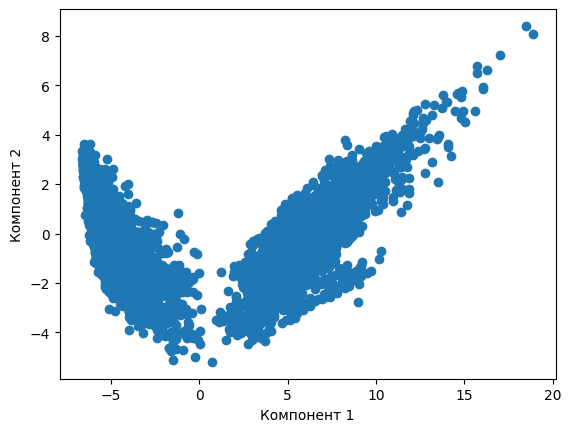

In [138]:
pca_2c = PCA(n_components=2)
df_2c = pca_2c.fit_transform(df)

plt.scatter(df_2c[:, 0], df_2c[:, 1])
plt.xlabel('Компонент 1')
plt.ylabel('Компонент 2')
plt.show

In [139]:
pca_33c = PCA(n_components=33)
df = pca_33c.fit_transform(df)
df.shape

(7352, 33)

4. Подберите оптимальное число кластеров: 

воспользуйтесь методом локтя, чтобы оценить, как варьируется значение целевой функции кластеризации в зависимости от количества кластеров, на которые мы делим данные;

выберите оптимальное количество кластеров и объясните свой выбор;

повторите визуализацию данных по первым двум главным компонентам, размечая наблюдения каждого кластера своим цветом.

In [140]:
distortion = []
K = range(1, 34)
for k in tqdm(K):
    model = KMeans(n_clusters=k, random_state=25)
    model.fit(df)
    distortion.append(model.inertia_)

  0%|          | 0/33 [00:00<?, ?it/s]c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
  6%|▌         | 2/33 [00:00<00:01, 19.05it/s]c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\U

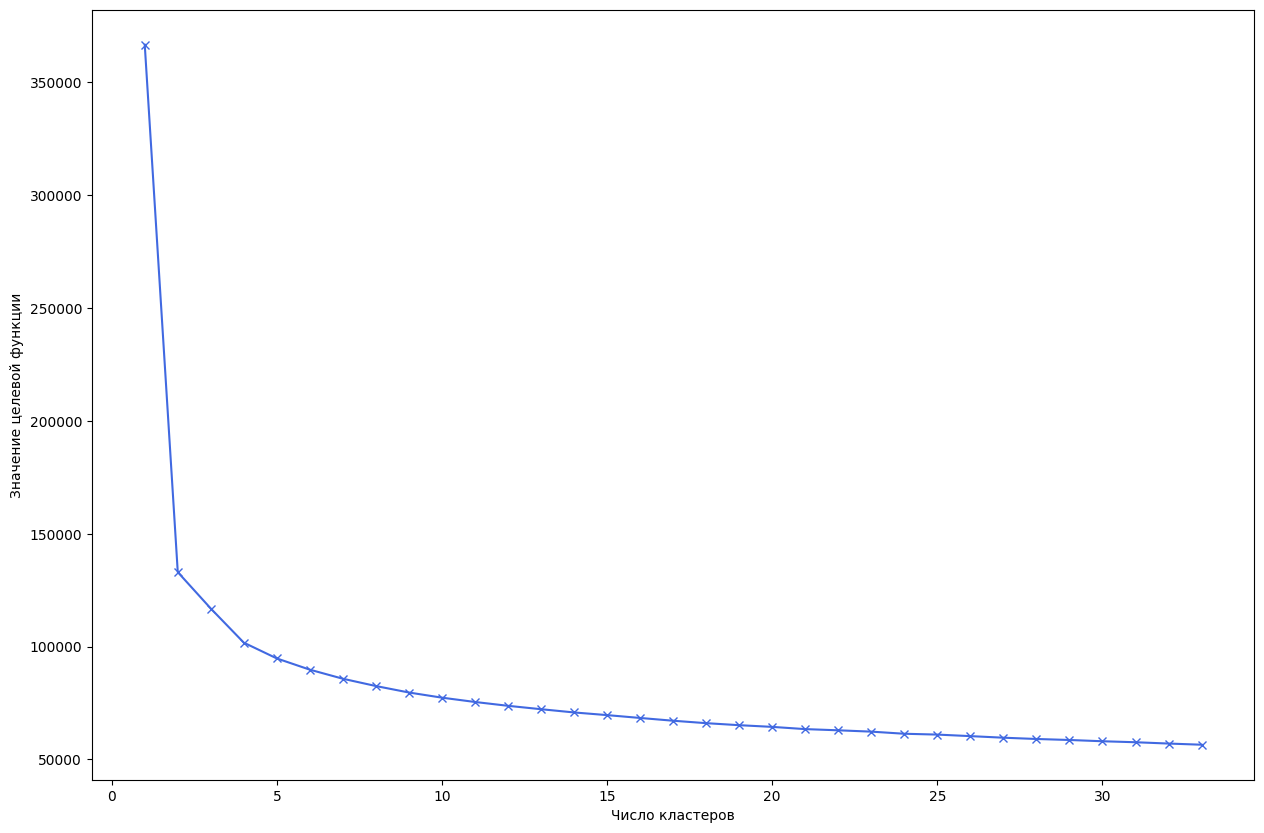

In [141]:
plt.figure(figsize=(15, 10))
plt.plot(K, distortion, c='royalblue', marker = 'x')
plt.xlabel('Число кластеров')
plt.ylabel('Значение целевой функции')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

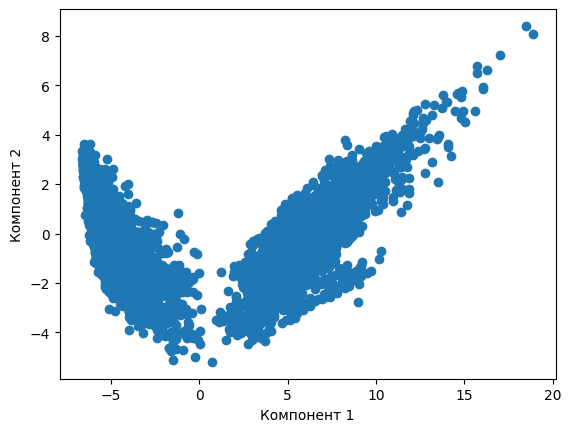

In [142]:
pca_5c = PCA(n_components=5)
df_5c = pca_5c.fit_transform(df)

plt.scatter(df_2c[:, 0], df_2c[:, 1])
plt.xlabel('Компонент 1')
plt.ylabel('Компонент 2')
plt.show

5. Оцените качество кластеризации:

подгрузите реальные метки наблюдений из файла y_train.txt, а также их значения из файла activity_labels.txt;

определите, насколько логична полученная кластеризация. Можно, например, сформировать сводную таблицу, где в строках будут реальные активности, а в столбцах — лейблы, полученные согласно кластеризации;

сделайте выводы, опишите, почему те или иные виды активности могли объединиться в один кластер, а другие отделиться от них.

In [143]:
y_train = np.loadtxt('y_train.txt', dtype='float64').tolist()
y_train = pd.DataFrame(y_train,columns=['activity'])
y_train.sample(10)

,activity
2135,6.0
961,3.0
422,6.0
881,4.0
6870,6.0
600,6.0
5971,6.0
505,2.0
2271,4.0
4999,1.0


In [144]:
activity_labels = pd.read_csv('activity_labels.txt', names=['activity'])
activity_labels

,activity
0,1 WALKING
1,2 WALKING_UPSTAIRS
2,3 WALKING_DOWNSTAIRS
3,4 SITTING
4,5 STANDING
5,6 LAYING


In [154]:
distortion = []
K = range(1, 6)
for k in tqdm(K):
    model = KMeans(n_clusters=k, random_state=25)
    model.fit(df)
    distortion.append(model.inertia_)

  0%|          | 0/5 [00:00<?, ?it/s]c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\User\AppData\Local\Programs\Python\Python3

In [146]:
#переведу для удобства значения колонок на русский язык
activity_ru = {1.0 : "ходьба", 2.0 : "ходьба на подъем", 3.0 : "ходьба на спуск", 4.0 : "сидение", 5.0 : "положение стоя", 6.0 : "положение лежа" }
y_train['activity'] = y_train['activity'].replace(activity_ru)

In [156]:
labels_df = pd.DataFrame({'cluster':model.labels_, 'activity':y_train['activity']})
activity_cluster = pd.pivot_table(labels_df, index='activity', columns='cluster', aggfunc=len, fill_value=0)
activity_cluster

cluster,0,1,2,3,4
activity,,,,,
положение лежа,9,0,0,160,1238
положение стоя,0,961,0,413,0
сидение,1,927,0,309,49
ходьба,850,0,376,0,0
ходьба на подъем,915,0,158,0,0
ходьба на спуск,257,0,729,0,0


Вывод: Положение лежа, положение стоя и сидение находятся в одном класстере(3). Я думаю, что это связанно с проделанной активностью. Подкрепляет мою теорию то, что ходьба, ходьба на подъем и хоьба на спуск так же находятся в отдельном класстере (2), а так же имеются анономальные пересечения в нулевом кластере. Таким образом произошло разбиение кластеров по проделанной активности.